In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys, os


root = os.path.dirname(os.getcwd())
sys.path.insert(0, root)

In [4]:
def get(hist):

    evals = []
    F = []
    G1 = []
    G2 = []

    for algorithm in history:

        F.append(algorithm.pop.get("F").min())
        G1.append(algorithm.pop.get("G")[:, 0].min())
        G2.append(algorithm.pop.get("G")[:, 1].min())
        evals.append(algorithm.evaluator.n_eval)


    F = np.array(F)
    G1 = np.array(G1)
    G2 = np.array(G2)
    
    return F, G1, G2, evals

    

In [11]:
import pickle, traceback
from iscso19.methods.restarts import MyGeneticAlgorithm, RestartDisplay


data = {}

for k in range(10000, 10500):
    folder = os.path.join(root, "results", "restarts-100")
    fname = "restarts_only_%s" % k
    
    print(fname, end=" ")

    try:
        
        history = np.load(os.path.join(folder, fname + ".npy"), allow_pickle=True)


        F, G1, G2, evals = get(history)
        
        feasible = None
        for h in history:
            if np.any(h.pop.get("feasible")):
                feasible = h
                break
        
        
        data[fname] = {
            "algorithm" : history[-1],
            "feasible" : feasible,
            "F" : F,
            "G1" : G1,
            "G2" : G2,
            "evals" : evals, 
        }
        
    except Exception as err:
        print(err)
        print(traceback.format_exc())
        continue
    

    

restarts_only_10000 restarts_only_10001 restarts_only_10002 restarts_only_10003 restarts_only_10004 restarts_only_10005 restarts_only_10006 restarts_only_10007 restarts_only_10008 restarts_only_10009 restarts_only_10010 restarts_only_10011 restarts_only_10012 restarts_only_10013 restarts_only_10014 restarts_only_10015 restarts_only_10016 restarts_only_10017 restarts_only_10018 restarts_only_10019 restarts_only_10020 restarts_only_10021 restarts_only_10022 restarts_only_10023 restarts_only_10024 restarts_only_10025 restarts_only_10026 restarts_only_10027 restarts_only_10028 restarts_only_10029 restarts_only_10030 restarts_only_10031 restarts_only_10032 restarts_only_10033 restarts_only_10034 restarts_only_10035 restarts_only_10036 restarts_only_10037 restarts_only_10038 restarts_only_10039 restarts_only_10040 restarts_only_10041 restarts_only_10042 restarts_only_10043 restarts_only_10044 restarts_only_10045 restarts_only_10046 restarts_only_10047 restarts_only_10048 restarts_only_10049 

In [20]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()[:1]]

restarts_only_10197
n_gen 2000
G1 (max) 0.0
G2 (max) 0.0
Feasible since n_eval 10000
F (feasible) 53745.48185370697
F (best) 17217.594960825027
X (best) [-6828 -5731 -5149 -3748 -2775 -1726  -519   788  2097  3223]
[22 23  8 22 27 23 15 20 19 22 14 19 22 21 23 20 25 34 20 10 18 19 23 14
 31 29 30 20 27 28 30 31 31 22 28 22 11 19 30 22 15 17  7 17  8 14  8 13
 12 11 11 11 13  8 20  1 18  6 13 11  9 10  7 13 10 14 10 17 13 17  9 22
 12 27 26 27 14 19 20 19 19 18 20 17 22 14 26 21 20 19 24 23 11 16 23 21
 22 23 24 34 29 28 31 28 26 19 21 22 21 12 20 11 23 14 17 10 17 13 17 12
 13 15 11 12 11 11  7 16  1 26  8 11  8 11 11 13 13 11 17 11 17 13 17 13
 22 13  1 13 14 13 11  8 13 18 12  8  7 10  7  8  7  7  7  6  1  7  6 11
  5  5  1  8  6  7  4  7  2 10  8 13  4  8  1 13 12 14 13 11  8 11  7  7
  7 10  8  8 11 11 11 14 11  1 11  1 16  4 14  1 11  1 13  7 12  4  9  1
  5  1  5  1  6  1  7  3 13  1  2  5 12  5  8  5 15  6 12  4 16 10 15 11
  9 12  6 11  7 10  3  6  7  7 14 11 14 13 12 13 24 17 

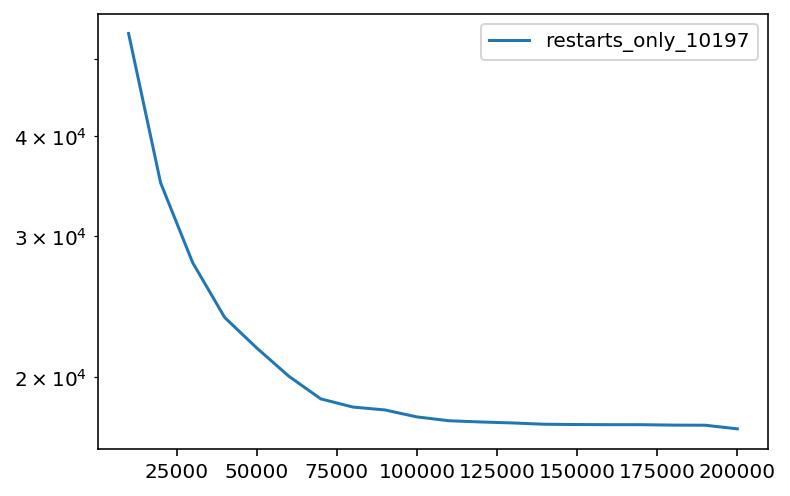

In [21]:

for fname in top:
    
    val = data[fname]
    
    F, G1, G2, evals, algorithm, feasible = val["F"], val["G1"], val["G2"], val["evals"], val["algorithm"], val["feasible"]
    
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    print(fname)
    
    
    print("n_gen", algorithm.n_gen)
    print("G1 (max)", G1.max())
    print("G2 (max)", G2.max())
    print("Feasible since n_eval", feasible.evaluator.n_eval)
    print("F (feasible)", feasible.pop.get("F").min())
    
    print("F (best)", algorithm.pop.get("F").min())
    
    print("X (best)", x[-10:])
    print(x[:-10])
    print("=" * 30)
    
    
#     plt.plot(evals[feas:feas+100], F[feas:feas+100], label=str(k))
    
    plt.plot(evals, F, label=fname)
    
plt.yscale("log")
plt.legend()
plt.show()

    

In [22]:
data = {}

for k in range(100):
    folder = os.path.join(root, "results", "cmaes")
    
    fname = "cmaes_%s" % k
    
    try:
        
        print(fname, end=" ")
        
        F = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "f")))
        G = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "g")))
        X = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "x")))
        
        data[fname] = {
            "F" : np.atleast_2d(F),
            "G" : G,
            "X" : X
            
        }
        
    except Exception as e:
        print(e)
        continue
    



cmaes_0 cmaes_1 cmaes_2 cmaes_3 cmaes_4 cmaes_5 cmaes_6 cmaes_7 cmaes_8 cmaes_9 cmaes_10 cmaes_11 cmaes_12 cmaes_13 cmaes_14 cmaes_15 cmaes_16 cmaes_17 cmaes_18 cmaes_19 cmaes_20 cmaes_21 cmaes_22 cmaes_23 cmaes_24 cmaes_25 cmaes_26 cmaes_27 cmaes_28 cmaes_29 cmaes_30 cmaes_31 cmaes_32 cmaes_33 cmaes_34 cmaes_35 cmaes_36 cmaes_37 cmaes_38 cmaes_39 cmaes_40 cmaes_41 cmaes_42 cmaes_43 cmaes_44 cmaes_45 cmaes_46 cmaes_47 cmaes_48 cmaes_49 cmaes_50 cmaes_51 cmaes_52 cmaes_53 cmaes_54 cmaes_55 cmaes_56 cmaes_57 cmaes_58 cmaes_59 cmaes_60 cmaes_61 cmaes_62 cmaes_63 cmaes_64 cmaes_65 cmaes_66 cmaes_67 cmaes_68 cmaes_69 cmaes_70 cmaes_71 cmaes_72 cmaes_73 cmaes_74 cmaes_75 cmaes_76 cmaes_77 cmaes_78 cmaes_79 cmaes_80 cmaes_81 cmaes_82 cmaes_83 cmaes_84 cmaes_85 cmaes_86 cmaes_87 cmaes_88 cmaes_89 cmaes_90 cmaes_91 cmaes_92 cmaes_93 cmaes_94 cmaes_95 cmaes_96 cmaes_97 cmaes_98 cmaes_99 

In [138]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()]

In [139]:
for fname in top:
    val = data[fname]
    
    F, G, X = val["F"][0], val["G"][0], val["X"][0]
    
    feas = np.where(G1+G2 == 0)[0].min()
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    print(fname)
    
    print("F", F)
    print("G", G)
    print("=" * 30)
    


    

cmaes_8
F [18860.54671612 18860.49220515 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.59632765 18860.75367989
 18860.67702309 18860.59632765 18860.59632765 18860.59632765
 18860.75367989 18860.75367989 18860.54671612 18860.75367989]
G [1043.25095528  348.30288678]
cmaes_22
F [19481.59481757]
G 942.6956738276133
cmaes_82
F [19739.94444689]
G 729.9301813029889
cmaes_59
F [19800.63313598]
G 788.0056142722906
cmaes_94
F [20227.08343955]
G 829.1433124725428
cmaes_6
F [20991.66540002]
G 862.4670018967038
cmaes_1
F [21365.88035877]
G 561.8949110571252
cmaes_85
F [21722.29412833]
G 711.7646892591554
cmaes_42
F [22820.77861413]
G 745.0619096195081
cmaes_25
F [23583.26660329 23587.43322843 23583.07018559 23583.41577865
 23582.92263188 23582.95090838 23582.83966595 23588.7748809
 23583.35914286 23588.255882   23583.78052213 23588.69567898
 23582.92263188 23583.07018559 23582.91274077 23589.38537503
 23582.92263188 

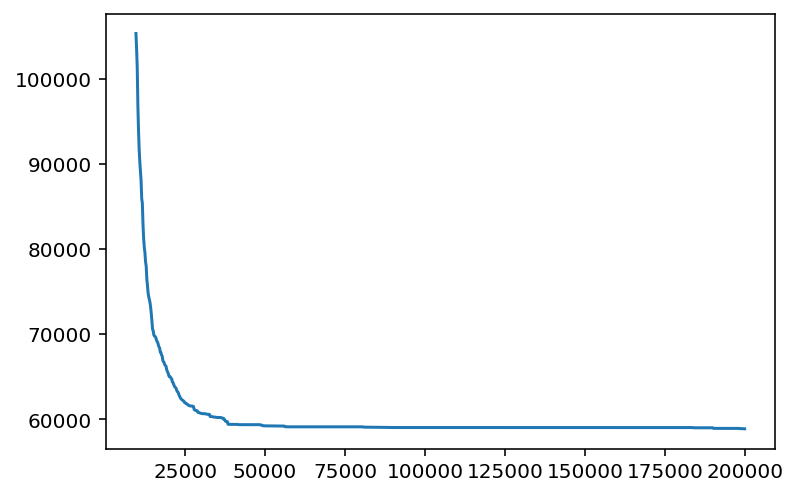

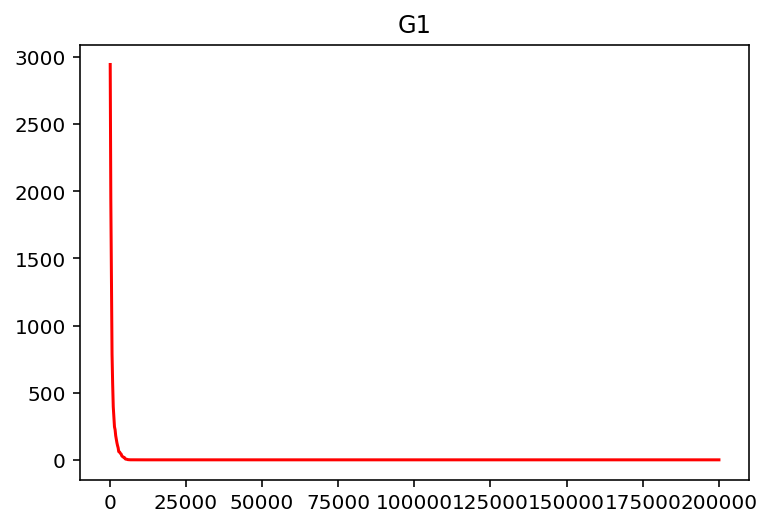

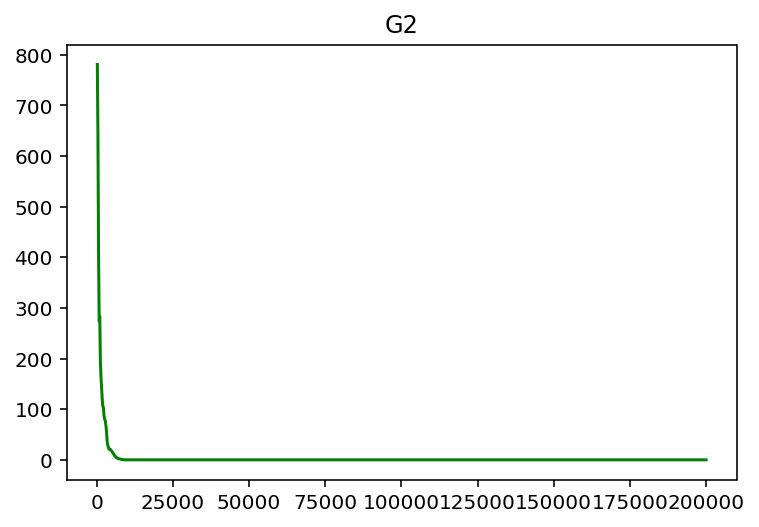

In [19]:
plt.plot(evals[feas:], F[feas:], label="F")
#plt.yscale("log")
plt.show()

plt.title("G1")
plt.plot(evals, G1, color="red")
plt.show()

plt.title("G2")
plt.plot(evals, G2, color="green")
plt.show()


